In [1]:
from astropy.wcs import WCS
from astropy.io import fits
from reproject import reproject_interp
import cmasher as cmr
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import colors
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
!jt -l
!jt -t 

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl
usage: jt [-h] [-l] [-t THEME] [-f MONOFONT] [-fs MONOSIZE] [-nf NBFONT]
          [-nfs NBFONTSIZE] [-tf TCFONT] [-tfs TCFONTSIZE] [-dfs DFFONTSIZE]
          [-ofs OUTFONTSIZE] [-mathfs MATHFONTSIZE] [-m MARGINS]
          [-cursw CURSORWIDTH] [-cursc CURSORCOLOR] [-cellw CELLWIDTH]
          [-lineh LINEHEIGHT] [-altp] [-altmd] [-altout] [-P] [-T] [-N] [-kl]
          [-vim] [-r] [-dfonts]
jt: error: argument -t/--theme: expected one argument


In [3]:
### 
mosaic_path = '/Users/hph/Dropbox/astrophys/CMZoom/cmzoom_RGB/cmzoom_rgb_custom/'
cmzoom_path = '/Users/hph/Dropbox/astrophys/CMZoom/cmzoom_catalog/catalog_acc/'
cmzoom_leaf_mask = fits.open(cmzoom_path+'dendrogram_mask_pruned_rms3e6_k14_dv3_dd1_dp17_pp6_pm2_gal_02-02-20.fits')
mosaic_8um  = fits.open(mosaic_path+'gcmosaic_8um.fits')
mosaic_24um = fits.open(mosaic_path+'24micron_gal.fits')
mosaic_70um = fits.open(mosaic_path+'gcmosaic_70um.fits')

mosaic_25um = fits.open(mosaic_path+'F0588_FO_IMA_07018936_FORF253_MOS_0001-0348.fits')
mosaic_25um[0].data = mosaic_25um[0].data[0,:,:]
mosaic_25um[0].header['NAXIS']=2
#mosaic_25um[0].header.remove('NAXIS3')

mosaic_37um = fits.open(mosaic_path+'F0588_FO_IMA_07018936_FORF371_MOS_0001-0348.fits')
mosaic_37um[0].data = mosaic_37um[0].data[0,:,:]
mosaic_37um[0].header['NAXIS']=2
#mosaic_37um[0].header.remove('NAXIS3')


In [4]:
mosaic_70um[0].header

SIMPLE  =                    T / Written by IDL:  Sat Jul 23 22:32:49 2011      
BITPIX  =                  -32 / Real*4 (floating point)                        
NAXIS   =                    2                                                  
NAXIS1  =                 8000                                                  
NAXIS2  =                 3000                                                  
EXTEND  =                    T                                                  
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'GLON-TAN'                                                            
CTYPE2  = 'GLAT-TAN'                                                            
CRPIX1  =                4000.                                                  
CRPIX2  =                1500.                                                  
CRVAL1  =                  0

In [7]:
wcs = WCS(cmzoom_leaf_mask[0].header)
from astropy.convolution import convolve_fft
### convolve images to worst resolution
mosaic_8um[0].header['CDELT1']*3600
beam_70um = 6 ## in arcsec


# kernel = np.outer(signal.windows.gaussian(40, 2),
#                   signal.windows.gaussian(40, 2))
kernel = np.outer(signal.windows.gaussian(40,2),
                  signal.windows.gaussian(40, 2))

In [8]:

array, footprint = reproject_interp(mosaic_8um, cmzoom_leaf_mask[0].header)
mosaic_8_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_8um_reprojected.fits', mosaic_8_conv, wcs.to_header(), overwrite=True)



In [9]:

array, footprint = reproject_interp(mosaic_24um, cmzoom_leaf_mask[0].header)
mosaic_24_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_24um_reprojected.fits', mosaic_24_conv, wcs.to_header(), overwrite=True)


In [10]:

array, footprint = reproject_interp(mosaic_70um, cmzoom_leaf_mask[0].header)
#mosaic_70_conv = convolve_fft(array_8um,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_70um_reprojected.fits', array, wcs.to_header(), overwrite=True)


In [11]:

array, footprint = reproject_interp(mosaic_25um, cmzoom_leaf_mask[0].header)
mosaic_25_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_25um_reprojected.fits', mosaic_25_conv, wcs.to_header(), overwrite=True)



In [12]:

array, footprint = reproject_interp(mosaic_37um, cmzoom_leaf_mask[0].header)
mosaic_37_conv = convolve_fft(array,kernel=kernel)
fits.writeto(mosaic_path+'mosaic_37um_reprojected.fits', mosaic_37_conv, wcs.to_header(), overwrite=True)


In [ ]:
mosaic_70um[0].header['CDELT1']*-3600.

In [ ]:
### convolve images to worst resolution
mosaic_8um[0].header['CDELT1']*3600
beam_70um = 6 ## in arcsec


# kernel = np.outer(signal.windows.gaussian(40, 2),
#                   signal.windows.gaussian(40, 2))
kernel = np.outer(signal.windows.gaussian(40,2),
                  signal.windows.gaussian(40, 2))

In [ ]:
plt.imshow(kernel)


In [14]:
array_8um, footprint_8um = reproject_interp(mosaic_8um, cmzoom_leaf_mask[0].header)
array_70um, footprint_70um = reproject_interp(mosaic_70um, cmzoom_leaf_mask[0].header)

#fits.writeto(mosaic_path+'mosaic_8um_reprojected.fits', array, wcs.to_header(), overwrite=True)

In [16]:


#mosaic_8_conv = signal.fftconvolve(array, kernel,mode='same')
mosaic_8_conv = convolve_fft(array_8um,kernel=kernel)
mosaic_70_conv = convolve_fft(array_70um,kernel=kernel)


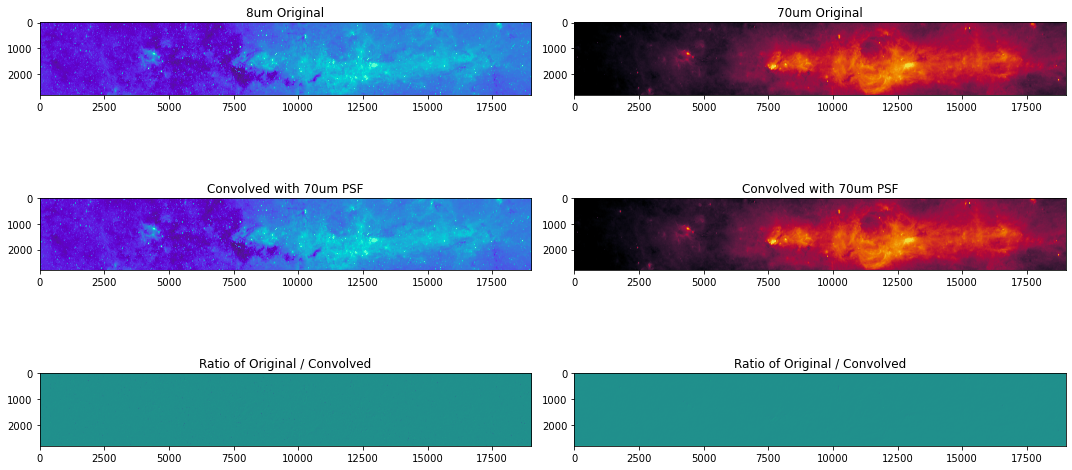

In [17]:
fig, ax = plt.subplots(nrows=3,ncols=2,figsize=(15,8))
norm = colors.LogNorm(vmin=10, vmax=1e3)
ax[0,0].imshow(array_8um, cmap=cmr.cosmic,norm=norm)
ax[0,0].set_title('8um Original')
#ax[0,0].set_xlim(10000,12000)
#ax[0,0].set_ylim(2000,1000)

ax[1,0].imshow(mosaic_8_conv, cmap=cmr.cosmic,norm=norm)
ax[1,0].set_title('Convolved with 70um PSF')
#ax[1,0].set_xlim(10000,12000)
#ax[1,0].set_ylim(2000,1000)

ax[2,0].imshow((array_8um/mosaic_8_conv), cmap='viridis', norm=colors.LogNorm(vmin=0.5, vmax=2))
ax[2,0].set_title('Ratio of Original / Convolved')
#ax[2,0].set_xlim(10000,12000)
#ax[2,0].set_ylim(2000,1000)

norm = colors.LogNorm(vmin=1e3, vmax=1e5)
ax[0,1].imshow(array_70um, cmap=cmr.ember,norm=norm)
ax[0,1].set_title('70um Original')
#ax[0,1].set_xlim(10000,12000)
#ax[0,1].set_ylim(2000,1000)

ax[1,1].imshow(mosaic_70_conv, cmap=cmr.ember,norm=norm)
ax[1,1].set_title('Convolved with 70um PSF')
#ax[1,1].set_xlim(10000,12000)
#ax[1,1].set_ylim(2000,1000)

ax[2,1].imshow((array_70um/mosaic_70_conv), cmap='viridis', norm=colors.LogNorm(vmin=0.5, vmax=2))
ax[2,1].set_title('Ratio of Original / Convolved')
#ax[2,1].set_xlim(10000,12000)
#ax[2,1].set_ylim(2000,1000)

plt.tight_layout()

In [18]:
leaf_23935_8um = mosaic_8_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
print(len(np.where(cmzoom_leaf_mask[0].data==23935)[0]))

253


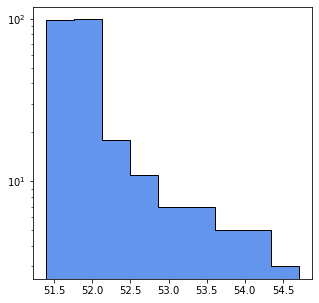

In [19]:
fig, ax = plt.subplots(figsize=(5,5))
#bins = np.logspace(np.log10(np.min(leaf_23935_8um)),np.log10(np.max(leaf_23935_8um)),10)
bins = np.linspace(np.min(leaf_23935_8um),np.max(leaf_23935_8um),10)
ax.hist(leaf_23935_8um.flatten(),log=True,histtype='step',bins=bins,color='k')
ax.hist(leaf_23935_8um.flatten(),log=True,bins=bins,color='cornflowerblue')
#ax.set_xscale('log')
ax.set_yscale('log')


(2380.0, 2320.0)

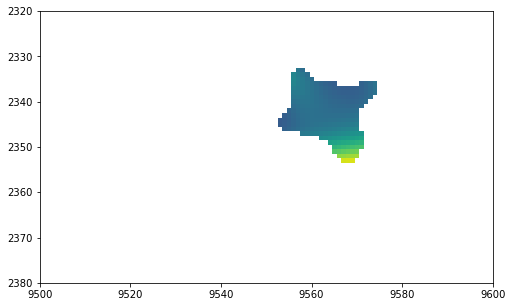

In [23]:
### show just the leaf
%matplotlib inline
leaf_only = np.zeros_like(mosaic_8_conv)
leaf_only[np.where(cmzoom_leaf_mask[0].data==23935)] = mosaic_8_conv[np.where(cmzoom_leaf_mask[0].data==23935)]
fig, ax = plt.subplots(figsize=(10,5))
norm = colors.LogNorm(vmin=50, vmax=55)
ax.imshow(leaf_only,norm=norm)
ax.set_xlim(9500,9600)
ax.set_ylim(2380,2320)

In [41]:
leaf_only[np.where(leaf_only==0)]
leafid = 18690 #12103 #23935
leaf_test_8um = mosaic_8_conv[np.where(cmzoom_leaf_mask[0].data==leafid)]
leaf_test_24um = mosaic_24_conv[np.where(cmzoom_leaf_mask[0].data==leafid)]
leaf_test_70um = mosaic_70_conv[np.where(cmzoom_leaf_mask[0].data==leafid)]
leaf_test_25um = mosaic_25_conv[np.where(cmzoom_leaf_mask[0].data==leafid)]
leaf_test_37um = mosaic_37_conv[np.where(cmzoom_leaf_mask[0].data==leafid)]
print(len(np.where(cmzoom_leaf_mask[0].data==leafid)[0]))

468


Text(0.5, 0, 'Wavelength [$\\mu$m]')

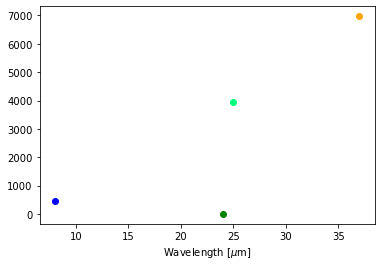

In [51]:
fig, ax = plt.subplots()
ax.scatter([8],[np.median(leaf_test_8um)],color='blue',marker='o')
ax.scatter([24],[np.median(leaf_test_24um)],color='green',marker='o')
#ax.scatter([70],[np.mean(leaf_23935_70um)],color='red',marker='o')
ax.scatter([25],[np.median(leaf_test_25um)/(((mosaic_25um[0].header['CDELT1']*2*np.pi)/360.)**2)/1e6],color='springgreen',marker='o')
ax.scatter([37],[np.median(leaf_test_37um)/(((mosaic_25um[0].header['CDELT1']*2*np.pi)/360.)**2)/1e6],color='orange',marker='o')
ax.set_xlabel('Wavelength [$\mu$m]')



In [48]:
print(mosaic_25um[0].header['BUNIT'], mosaic_25um[0].header['CDELT1'])
print(mosaic_25um[0].header['CDELT1']*2*np.pi/360.)
print((np.median(leaf_test_25um)/((mosaic_25um[0].header['CDELT1']*2*np.pi)/360.)**2)/1e6)
print((np.median(leaf_test_37um)/((mosaic_25um[0].header['CDELT1']*2*np.pi)/360.)**2)/1e6)


Jy -0.000213333335188
-3.7233691032912765e-06
3962.9607188171462
6972.1993832747785


Text(0.5, 1.0, 'Mass-Weighted Velocity Dispersion')

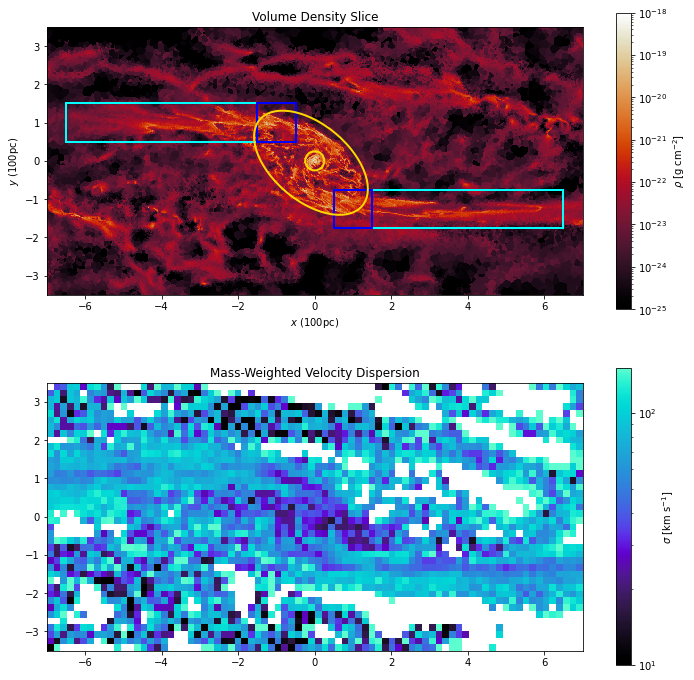

In [129]:
plt.close()
Nx, Ny, Nz = 601, 601, 11
plotrange=3.5
zslice=5
xgrid, ygrid, zgrid=linspace(-2*plotrange,2*plotrange,Nx),linspace(-plotrange,plotrange,Ny),linspace(-10,10,Nz)
XGRID,YGRID,ZGRID = np.meshgrid(xgrid,ygrid,zgrid)
RHO = rhof(XGRID,YGRID,ZGRID)
fig, axes = plt.subplots(2,1,figsize=(12,12),facecolor='white')
ax=axes[0]
u = 1.0
extent = (xgrid.min()/u,xgrid.max()/u,ygrid.min()/u,ygrid.max()/u)
powmax,powmin = -18,-25
levels = logspace(powmin,powmax,256)
#norm = colors.BoundaryNorm(levels, 256)
norm = colors.LogNorm(vmin=10**powmin, vmax=10**powmax)
im = ax.imshow(RHO[:,:,zslice],norm=norm,extent=extent,cmap=cmr.sunburst,interpolation='nearest',origin='lower')

### construct array of cell centers
ccs = np.array(np.meshgrid(np.linspace(-2*plotrange,2*plotrange,Nx_sigma+1)[:-1],np.linspace(-1*plotrange,1*plotrange,Ny_sigma+1)[:-1]))
xcens = ccs[0].flatten()
ycens = ccs[1].flatten()
ccs[0] = ccs[0]+(xgridstep*0.5)
ccs[1] = ccs[1]+(ygridstep*0.5)

### define dust lane regions
box_i = [-6.5,0.5,5.0,1.0]
dln_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
#dln_cond = np.where((ccs[0]+(xgridstep/2.)>box_i[0])&(ccs[0]+(xgridstep/2.)<box_i[0]+box_i[2])&(ccs[1]+(ygridstep/2.)>box_i[1])&(ccs[1]+(ygridstep/2.)<box_i[3]+box_i[1]))
rect_dln = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='cyan', facecolor='none')
ax.add_patch(rect_dln)
box_i = [1.5,-1.75,5.0,1.0]
dlf_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
rect_dlf = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='cyan', facecolor='none')
ax.add_patch(rect_dlf)

### define collision regions 
box_i = [-1.5,0.5,1.0,1.0]
crn_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
rect_crn = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(rect_crn)
box_i = [0.5,-1.75,1.0,1.0]
crf_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
rect_crf = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(rect_crf)

### define whole CMZ region
ellipse_cmz = patches.Ellipse(xy=(-0.1,-0.05), width = 3.5, height = 2.0, angle = -40, linewidth=2, edgecolor='gold', facecolor='none')
ax.add_patch(ellipse_cmz)
### construct scale-free ellipse for the region to check quickly which points are inside
xs = (xcens+0.1+(xgridstep/2.))*np.cos(np.radians(40.))-(ycens+0.05+(ygridstep/2.))*np.sin(np.radians(40.))
ys = (xcens+0.1+(xgridstep/2.))*np.sin(np.radians(40.))+(ycens+0.05+(ygridstep/2.))*np.cos(np.radians(40.))
rs2 = (xs/(3.5/2.))**2 + (ys/(2.0/2))**2
cmzcond = np.where(rs2<=1)[0]

### define CND region
### to do, define region by ellipse --> icond = np.where((x>box_i[0])&(x<box_i[0]+box_i[2])&(y>box_i[1])&(y<box_i[3]+box_i[1])&(z>-.5)&(z<0.5))[0]
ellipse_cnd = patches.Ellipse(xy=(-0.0,-0.0), width = 0.5, height = 0.5, angle = 0, linewidth=2, edgecolor='gold', facecolor='none')
ax.add_patch(ellipse_cnd)
xs = (xcens+(xgridstep/2.))*np.cos(np.radians(0))-(ycens+(ygridstep/2.))*np.sin(np.radians(0))
ys = (xcens+(xgridstep/2.))*np.sin(np.radians(0))+(ycens+(ygridstep/2.))*np.cos(np.radians(0))
rs2 = (xs/(0.5/2.))**2 + (ys/(0.5/2))**2
cndcond = np.where(rs2<=1)[0]


# for i in range(Nx-0):
#     ax.plot([-plotrange+(i*gridstep),-plotrange+(i*gridstep)],[-plotrange,plotrange],color='w',alpha=0.3)
# for j in range(Ny-0):
#     ax.plot([-plotrange,plotrange],[-plotrange+(j*gridstep),-plotrange+(j*gridstep)],color='w',alpha=0.3)
cbar = plt.colorbar(im, ax=axes[0],label='$\\rho$ [g cm$^{-2}$]')
ax.set_xlabel(r'$x$ (100pc)')
ax.set_ylabel(r'$y$ (100pc)')
ax.set_xlim(xgrid.min(),xgrid.max())
ax.set_ylim(ygrid.min(),ygrid.max())
ax.set_title("Volume Density Slice")
#ax.scatter(ccs[0].flatten()[cndcond],ccs[1].flatten()[cndcond],color='limegreen',s=100,marker='.',zorder=1000)
#ax.scatter(ccs[0][dln_cond],ccs[1][dln_cond],color='limegreen',s=100,marker='.',zorder=1000)

ax=axes[1]
im_sigma = ax.imshow(sigma_grid.T,norm=colors.LogNorm(vmin=10,vmax=150),extent=extent,cmap=cmr.cosmic,origin='lower')
#ax.contour(RHO[:,:,zslice],levels=[0.1e-21],extent=extent,colors='red',alpha=0.35)
cbar_sigma = plt.colorbar(im_sigma, ax=axes[1], ticks=[1,10,100],label='$\\sigma$ [km s$^{-1}$]')
#ax.scatter(ccs[0].flatten(),ccs[1].flatten(),color='r',s=1.0,marker='.')
#ax.scatter(ccs[0].flatten()[cndcond],ccs[1].flatten()[cndcond],color='limegreen',s=100,marker='.',zorder=1000)
#ax.scatter(ccs[0][dln_cond],ccs[1][dln_cond],color='limegreen',s=100,marker='.',zorder=1000)



ax.set_title("Mass-Weighted Velocity Dispersion")


Text(0.5, 1.0, 'Mass-Weighted Velocity Dispersion')

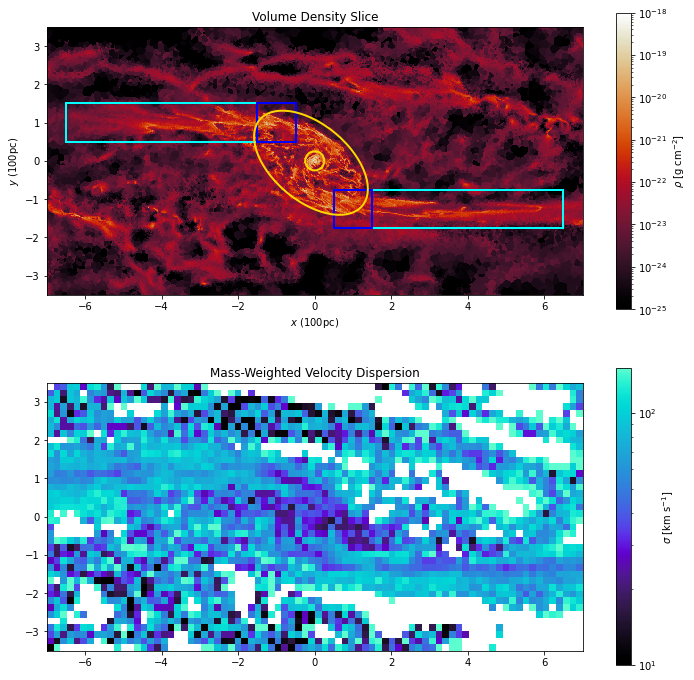

In [129]:
plt.close()
Nx, Ny, Nz = 601, 601, 11
plotrange=3.5
zslice=5
xgrid, ygrid, zgrid=linspace(-2*plotrange,2*plotrange,Nx),linspace(-plotrange,plotrange,Ny),linspace(-10,10,Nz)
XGRID,YGRID,ZGRID = np.meshgrid(xgrid,ygrid,zgrid)
RHO = rhof(XGRID,YGRID,ZGRID)
fig, axes = plt.subplots(2,1,figsize=(12,12),facecolor='white')
ax=axes[0]
u = 1.0
extent = (xgrid.min()/u,xgrid.max()/u,ygrid.min()/u,ygrid.max()/u)
powmax,powmin = -18,-25
levels = logspace(powmin,powmax,256)
#norm = colors.BoundaryNorm(levels, 256)
norm = colors.LogNorm(vmin=10**powmin, vmax=10**powmax)
im = ax.imshow(RHO[:,:,zslice],norm=norm,extent=extent,cmap=cmr.sunburst,interpolation='nearest',origin='lower')

### construct array of cell centers
ccs = np.array(np.meshgrid(np.linspace(-2*plotrange,2*plotrange,Nx_sigma+1)[:-1],np.linspace(-1*plotrange,1*plotrange,Ny_sigma+1)[:-1]))
xcens = ccs[0].flatten()
ycens = ccs[1].flatten()
ccs[0] = ccs[0]+(xgridstep*0.5)
ccs[1] = ccs[1]+(ygridstep*0.5)

### define dust lane regions
box_i = [-6.5,0.5,5.0,1.0]
dln_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
#dln_cond = np.where((ccs[0]+(xgridstep/2.)>box_i[0])&(ccs[0]+(xgridstep/2.)<box_i[0]+box_i[2])&(ccs[1]+(ygridstep/2.)>box_i[1])&(ccs[1]+(ygridstep/2.)<box_i[3]+box_i[1]))
rect_dln = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='cyan', facecolor='none')
ax.add_patch(rect_dln)
box_i = [1.5,-1.75,5.0,1.0]
dlf_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
rect_dlf = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='cyan', facecolor='none')
ax.add_patch(rect_dlf)

### define collision regions 
box_i = [-1.5,0.5,1.0,1.0]
crn_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
rect_crn = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(rect_crn)
box_i = [0.5,-1.75,1.0,1.0]
crf_cond = np.where((ccs[0]>box_i[0])&(ccs[0]<box_i[0]+box_i[2])&(ccs[1]>box_i[1])&(ccs[1]<box_i[3]+box_i[1]))
rect_crf = patches.Rectangle((box_i[0], box_i[1]), box_i[2], box_i[3], linewidth=2, edgecolor='blue', facecolor='none')
ax.add_patch(rect_crf)

### define whole CMZ region
ellipse_cmz = patches.Ellipse(xy=(-0.1,-0.05), width = 3.5, height = 2.0, angle = -40, linewidth=2, edgecolor='gold', facecolor='none')
ax.add_patch(ellipse_cmz)
### construct scale-free ellipse for the region to check quickly which points are inside
xs = (xcens+0.1+(xgridstep/2.))*np.cos(np.radians(40.))-(ycens+0.05+(ygridstep/2.))*np.sin(np.radians(40.))
ys = (xcens+0.1+(xgridstep/2.))*np.sin(np.radians(40.))+(ycens+0.05+(ygridstep/2.))*np.cos(np.radians(40.))
rs2 = (xs/(3.5/2.))**2 + (ys/(2.0/2))**2
cmzcond = np.where(rs2<=1)[0]

### define CND region
### to do, define region by ellipse --> icond = np.where((x>box_i[0])&(x<box_i[0]+box_i[2])&(y>box_i[1])&(y<box_i[3]+box_i[1])&(z>-.5)&(z<0.5))[0]
ellipse_cnd = patches.Ellipse(xy=(-0.0,-0.0), width = 0.5, height = 0.5, angle = 0, linewidth=2, edgecolor='gold', facecolor='none')
ax.add_patch(ellipse_cnd)
xs = (xcens+(xgridstep/2.))*np.cos(np.radians(0))-(ycens+(ygridstep/2.))*np.sin(np.radians(0))
ys = (xcens+(xgridstep/2.))*np.sin(np.radians(0))+(ycens+(ygridstep/2.))*np.cos(np.radians(0))
rs2 = (xs/(0.5/2.))**2 + (ys/(0.5/2))**2
cndcond = np.where(rs2<=1)[0]


# for i in range(Nx-0):
#     ax.plot([-plotrange+(i*gridstep),-plotrange+(i*gridstep)],[-plotrange,plotrange],color='w',alpha=0.3)
# for j in range(Ny-0):
#     ax.plot([-plotrange,plotrange],[-plotrange+(j*gridstep),-plotrange+(j*gridstep)],color='w',alpha=0.3)
cbar = plt.colorbar(im, ax=axes[0],label='$\\rho$ [g cm$^{-2}$]')
ax.set_xlabel(r'$x$ (100pc)')
ax.set_ylabel(r'$y$ (100pc)')
ax.set_xlim(xgrid.min(),xgrid.max())
ax.set_ylim(ygrid.min(),ygrid.max())
ax.set_title("Volume Density Slice")
#ax.scatter(ccs[0].flatten()[cndcond],ccs[1].flatten()[cndcond],color='limegreen',s=100,marker='.',zorder=1000)
#ax.scatter(ccs[0][dln_cond],ccs[1][dln_cond],color='limegreen',s=100,marker='.',zorder=1000)

ax=axes[1]
im_sigma = ax.imshow(sigma_grid.T,norm=colors.LogNorm(vmin=10,vmax=150),extent=extent,cmap=cmr.cosmic,origin='lower')
#ax.contour(RHO[:,:,zslice],levels=[0.1e-21],extent=extent,colors='red',alpha=0.35)
cbar_sigma = plt.colorbar(im_sigma, ax=axes[1], ticks=[1,10,100],label='$\\sigma$ [km s$^{-1}$]')
#ax.scatter(ccs[0].flatten(),ccs[1].flatten(),color='r',s=1.0,marker='.')
#ax.scatter(ccs[0].flatten()[cndcond],ccs[1].flatten()[cndcond],color='limegreen',s=100,marker='.',zorder=1000)
#ax.scatter(ccs[0][dln_cond],ccs[1][dln_cond],color='limegreen',s=100,marker='.',zorder=1000)



ax.set_title("Mass-Weighted Velocity Dispersion")


In [119]:
mosaic_8um[0].header['BUNIT']

'MJy/sr'

In [44]:
np.median(leaf_test_25um)

0.05494041667684675

In [32]:
forcast_25um_pix_rad = mosaic_25um[0].header['CDELT1']*(2*np.pi/360.)
forcast_25um_pix_sr = forcase_25um_pix_rad**2



In [35]:
np.median(leaf_23935_25um)

0.0